In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
df = pd.read_csv('../data/cve-details/github-cve-details-patches.csv')

In [12]:
df.keys()

Index(['cve_id', 'cve_href', 'cwe_id', 'vuln_type', 'publish_date',
       'update_date', 'score', 'acces_level', 'access', 'complexity',
       'authentication', 'confidentiality', 'integrity', 'availability',
       'summary', 'refs', 'code_refs', 'commits'],
      dtype='object')

In [13]:
f"{len(df['cve_id'].unique())} unique CVE entries"

'7333 unique CVE entries'

In [14]:
df['report_year'] = df.apply(
    lambda row: row['cve_id'].split('-')[1], axis=1)

df_rep_year = df['report_year'].value_counts().sort_index()

In [15]:
df['publish_year'] = df.apply(
    lambda row: row['publish_date'].split('-')[0], axis=1)

df_pub_year = df['publish_year'].value_counts().sort_index()

In [16]:
df['cwe_id'].value_counts()[df['cwe_id'].value_counts() > 150].sort_values()

CWE-352     159
CWE-264     167
CWE-89      195
CWE-22      208
CWE-476     258
CWE-787     278
CWE-200     324
CWE-20      433
CWE-119     434
CWE-125     486
CWE-79     1013
Name: cwe_id, dtype: int64

In [18]:
df_score = pd.DataFrame(columns=['score', 'count'])

for n in range(0,10):
    if n == 0:
        df_score = pd.concat([df_score, pd.DataFrame({'score': f"{n}-{n+1}", 'count': len(df[(df['score'] == n) & (df['score'] < n+1)])}, index=[0])], ignore_index=True)
    elif n == 9:
        df_score = pd.concat([df_score, pd.DataFrame({'score': f"{n}-{n+1}", 'count': len(df[(df['score'] > n) & (df['score'] <= n+1)])}, index=[0])], ignore_index=True)
    else:
        df_score = pd.concat([df_score, pd.DataFrame({'score': f"{n}-{n+1}", 'count': len(df[(df['score'] >= n) & (df['score'] < n+1)])}, index=[0])], ignore_index=True)

In [19]:
df_score

,score,count
0,0-1,1380
1,1-2,1107
2,2-3,7189
3,3-4,7528
4,4-5,37366
5,5-6,30677
6,6-7,23200
7,7-8,32397
8,8-9,765
9,9-10,16355


Text(0.5, 1.0, 'Distribution of the number of CVEs per CWE (only the CWEs with more than 150 CVEs are presented)')

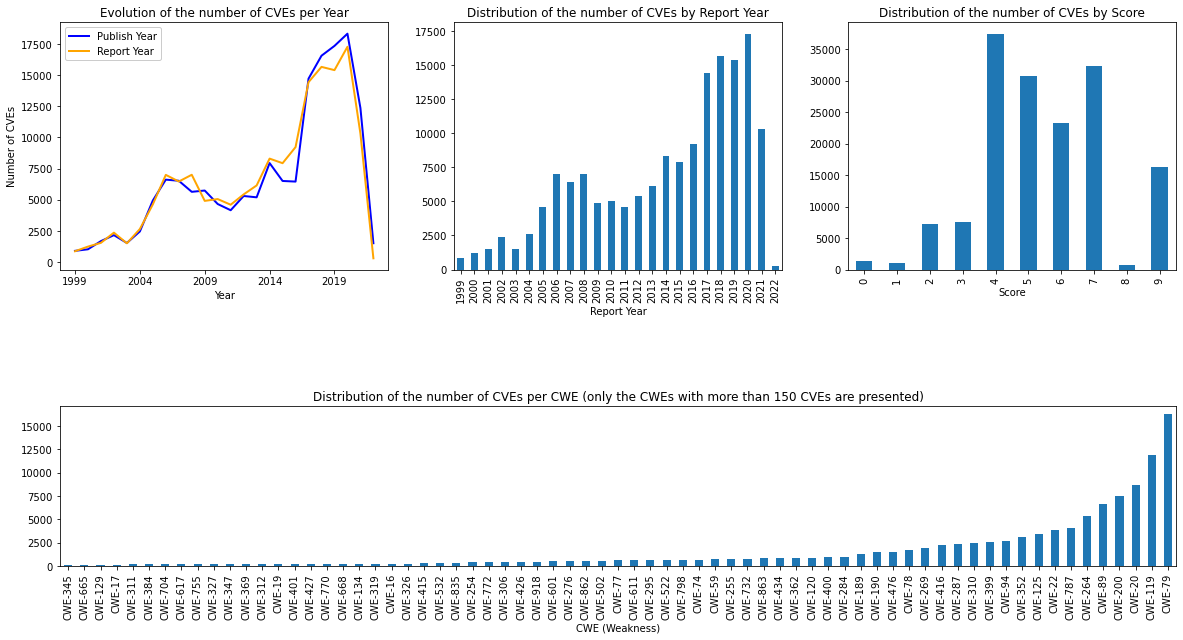

In [20]:
plt.figure(figsize=(20, 10))

plt.subplot(231)
df_pub_year.plot(kind="line", marker='', color='blue', linewidth=2, label='Publish Year')
df_rep_year.plot(kind="line", marker='', color='orange', linewidth=2, label='Report Year')
plt.ylabel('Number of CVEs')
plt.xlabel('Year')
plt.legend(framealpha=1, frameon=True)
plt.title('Evolution of the number of CVEs per Year')

plt.subplot(232)
df_rep_year.plot(kind="bar")
plt.xlabel('Report Year')
plt.title('Distribution of the number of CVEs by Report Year')

plt.subplot(233)
df_score['count'].plot(kind="bar")
plt.xlabel('Score')
plt.title('Distribution of the number of CVEs by Score')

plt.subplot(313)
df_cwe_id.plot(kind="bar")
plt.xlabel('CWE (Weakness)')
plt.title('Distribution of the number of CVEs per CWE (only the CWEs with more than 150 CVEs are presented)')
